# Multiclass classification

* We just solved a binary classification problem in the previous challenge. 
* What about a **multiclass classification task**?

🎯 Exercise Objectives:
- Write a Neural Network designed for a multiclass classification problem
- Observe how this model could easily overfit... !

## Imports

In [ ]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

## (1) Create a `Blobs` dataset

In [1]:
X, y = make_blobs(
    n_samples=1200,
    n_features=8 ,
    centers =7,
    cluster_std=8,
    random_state=1
)
print(X.shape)
print(y.shape)

(1200, 8)
(1200,)


In [2]:
X

array([[ -9.98345244,  -6.81358467,  -1.80303435, ...,  11.45356221,
          2.5072788 ,  17.18867817],
       [ 12.85789281,  -5.68392126, -16.395622  , ...,  -6.15287897,
          7.40741572,  -3.59605647],
       [ 11.28933721,  12.72416789, -13.07486267, ...,   7.36957339,
          7.11281172,  -1.86284857],
       ...,
       [-26.57778136,   1.69929719,   0.92330753, ...,   7.20906233,
        -21.77288071,   6.77409734],
       [  0.71285551,  21.72078756,   1.07111796, ...,  -3.11759605,
        -22.01074358,   4.95067068],
       [ -3.25105951,   6.82217023, -13.15522995, ..., -12.63067948,
          4.76326976,   1.73082175]])

In [3]:
y

array([2, 2, 5, ..., 1, 3, 0])

In [4]:
print(pd.DataFrame(y).value_counts())
pd.DataFrame(X)

0    172
1    172
2    172
3    171
4    171
5    171
6    171
Name: count, dtype: int64


,0,1,2,3,4,5,6,7
0,-9.983452,-6.813585,-1.803034,6.505192,9.449461,11.453562,2.507279,17.188678
1,12.857893,-5.683921,-16.395622,-11.026596,14.719776,-6.152879,7.407416,-3.596056
2,11.289337,12.724168,-13.074863,-16.300011,-10.331541,7.369573,7.112812,-1.862849
3,5.502440,-6.358943,0.271810,12.366895,-8.898767,-3.006504,-8.959976,16.158835
4,-13.791838,3.194847,-4.009333,-8.466332,-10.430255,2.237886,14.399150,9.520094
...,...,...,...,...,...,...,...,...
1195,-4.109192,11.030287,-8.156955,2.142741,-8.843507,-9.759293,-4.782305,0.191628
1196,11.382324,1.034699,10.539370,-7.583568,-6.035332,9.243585,-9.114250,-0.156599
1197,-26.577781,1.699297,0.923308,5.093832,-12.928930,7.209062,-21.772881,6.774097
1198,0.712856,21.720788,1.071118,-14.138434,-8.069240,-3.117596,-22.010744,4.950671


❓ Use _matplotlib_ to draw a scatterplot of two (arbitrary) dimensions of this blobs dataset. Each dot should be colored with the category it belongs to. ❓

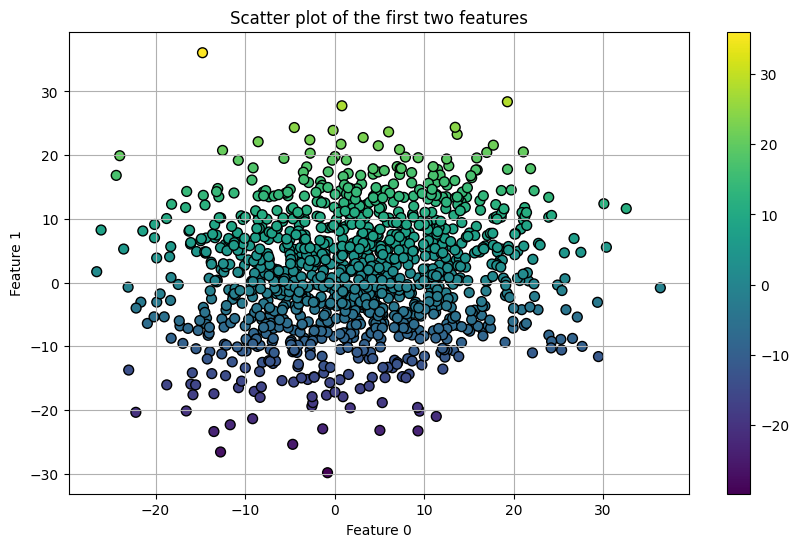

In [5]:
x = X[:, 0]
y = X[:, 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, cmap="viridis", edgecolors="k", s=50)
plt.colorbar()

# Label the axes
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Scatter plot of the first two features")

plt.grid(True)
plt.show()


❓ Repeat the operation on other dimensions. You should see visually that the data points are not easily separable ❓

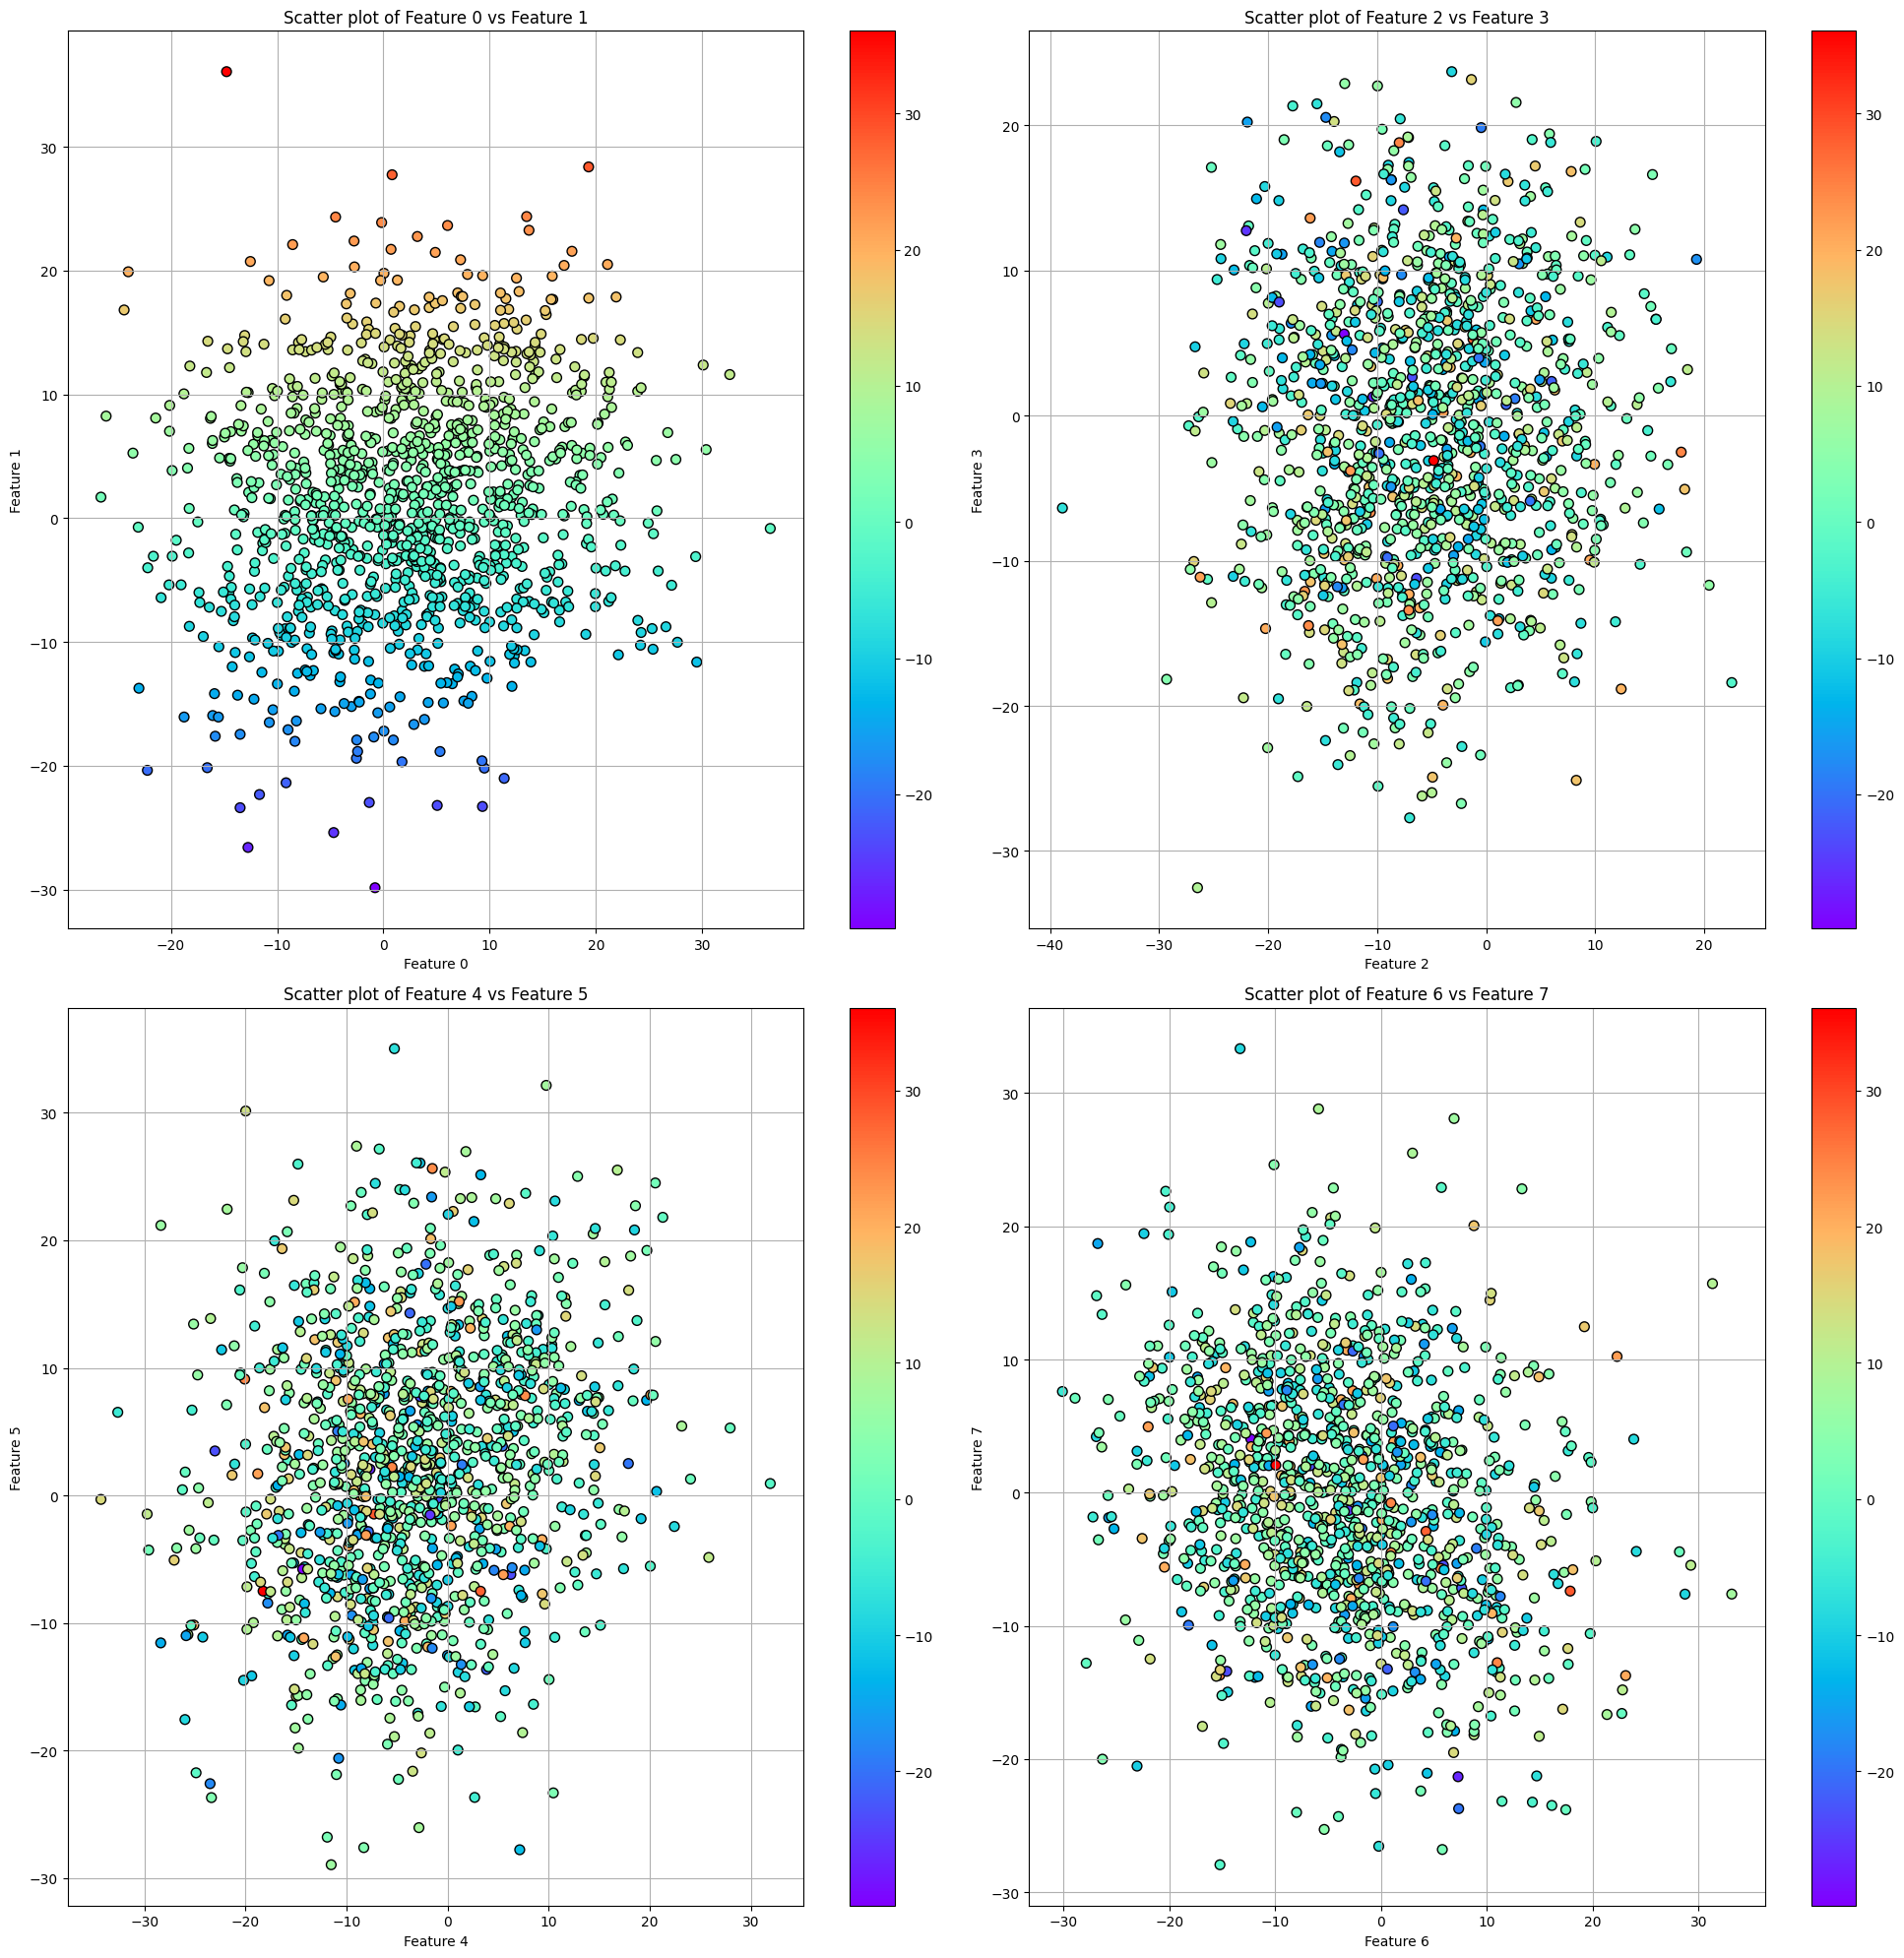

In [6]:
def plot_features(X, y, feature1, feature2):
    plt.scatter(X[:, feature1], X[:, feature2], c=y, cmap="rainbow", edgecolors="k", s=50)
    plt.colorbar()
    plt.xlabel(f"Feature {feature1}")
    plt.ylabel(f"Feature {feature2}")
    plt.title(f"Scatter plot of Feature {feature1} vs Feature {feature2}")
    plt.grid(True)

    
plt.figure(figsize=(20, 20))

pairs = [(0, 1), (2, 3), (4, 5), (6, 7)]
for i, (f1, f2) in enumerate(pairs, 1):
    plt.subplot(2, 2, i)
    plot_features(X, y, f1, f2)

plt.tight_layout()
plt.grid(True)
plt.show()

## (2) Encoding the target of a multi-class classification problem

❓ **Encoding the categorical target**:  Print `y`, then apply  *to_categorical* to *`y`* and store the *categorized version of y* into a variable called `y_cat`. ❓

In [7]:
# Printing original y
print("Original y:")
print(y[:10]) 

y_cat = to_categorical(y)

# Displaying the encoded y for first 10 samples
print("\nEncoded y:")
print(y_cat[:10])


Original y:
[ -6.81358467  -5.68392126  12.72416789  -6.35894256   3.19484739
   3.8035008  -10.70554085  -0.03148034   1.10225539  -0.72859999]

Encoded y:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0

## (3) Neural Network for a Multiclass Classification Task

❓ **Hold-out method**: Split the dataset $X$ and $y_{cat}$ into a _train_ and _test_ set (size: 70/30%)

Remark: Please call the variables `X_train`, `X_test`, `y_train`, and `y_test` ❓

In [8]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=1)
# Checking the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (840, 8)
Shape of X_test: (360, 8)
Shape of y_train: (840, 37)
Shape of y_test: (360, 37)


In Deep Learning, as in any Machine Learning algorithm, your numerical features should be scaled.

❓ **Scaling**: Fit a Sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) on the training set and transform both your train set and test set ❓

In [9]:
# Initializing the scaler
scaler = StandardScaler()
# Fitting the scaler on the training data
scaler.fit(X_train)
# Transforming both training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Checking if the transformation worked (by printing mean and std deviation)
print("Mean of X_train:", X_train.mean())
print("Standard Deviation of X_train:", X_train.std())

Mean of X_train: 6.396999332363997e-17
Standard Deviation of X_train: 0.9999999999999999


❓ **Initializing a model**: Complete the following function to build/initialize a model that has: 
- a first layer with:
    - 50 neurons
    - the `relu` activation
    - the correct input dimension
- a output layer:
    - designed for a multiclass classification task 
    - which outputs probabilities of belonging to each class ❓

In [10]:
def initialize_model():
    model = models.Sequential()
    model.add(layers.Dense(50, activation='relu', input_dim=X_train.shape[1]))
    model.add(layers.Dense(y_cat.shape[1], activation='softmax')) 
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )
    return model 

model = initialize_model()

❓  How many parameters (a.k.a. weights) are there in the model ❓

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 dense_1 (Dense)             (None, 37)                1887      
                                                                 
Total params: 2337 (9.13 KB)
Trainable params: 2337 (9.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


❓ **Fitting the model**: Fit your model on the train data with 50 epochs and plot the history ❓

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=32
)

Epoch 1/50


27/27 [==============================] - 2s 21ms/step - loss: 3.6932 - accuracy: 0.0190 - val_loss: 3.6107 - val_accuracy: 0.0361
Epoch 2/50
27/27 [==============================] - 0s 6ms/step - loss: 3.5949 - accuracy: 0.0333 - val_loss: 3.5588 - val_accuracy: 0.0639
Epoch 3/50
27/27 [==============================] - 0s 6ms/step - loss: 3.5236 - accuracy: 0.0595 - val_loss: 3.5203 - val_accuracy: 0.0778
Epoch 4/50
27/27 [==============================] - 0s 6ms/step - loss: 3.4642 - accuracy: 0.0810 - val_loss: 3.4894 - val_accuracy: 0.0889
Epoch 5/50
27/27 [==============================] - 0s 6ms/step - loss: 3.4105 - accuracy: 0.0940 - val_loss: 3.4630 - val_accuracy: 0.0861
Epoch 6/50
27/27 [==============================] - 0s 6ms/step - loss: 3.3631 - accuracy: 0.1000 - val_loss: 3.4383 - val_accuracy: 0.0861
Epoch 7/50
27/27 [==============================] - 0s 6ms/step - loss: 3.3182 - accuracy: 0.1060 - val_loss: 3.4174 - val_accuracy: 0.0806
Epoch 8/50
27/27 

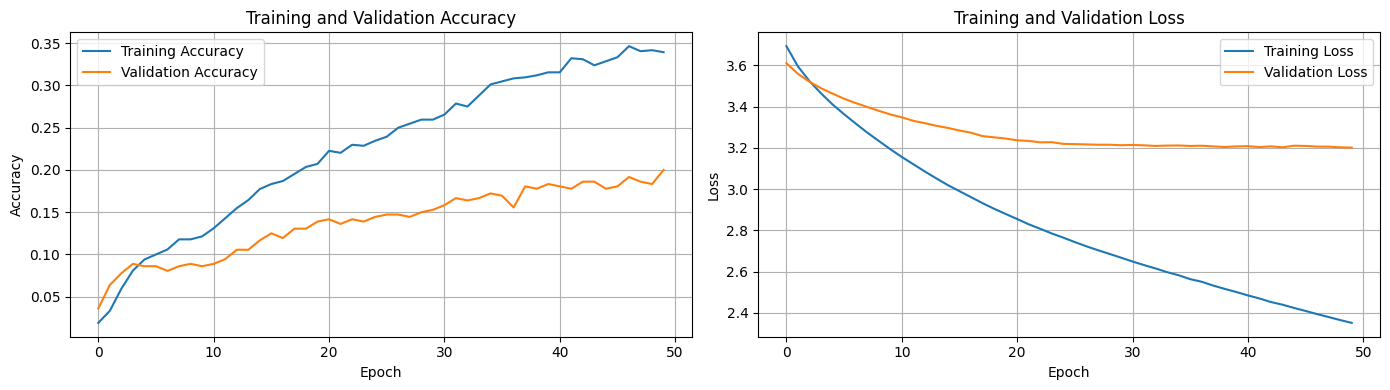

In [13]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()

❓ **Evaluation**:  Evaluate your model on the test set and print the accuracy ❓

In [14]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# Printing the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

12/12 [==============================] - 0s 3ms/step - loss: 3.2012 - accuracy: 0.2000
Test Accuracy: 20.00%


In [15]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.show()

In [16]:
accuracy_baseline = 1/7
print(f"Baseline Accuracy (Random Guessing): {accuracy_baseline * 100:.2f}%")

Baseline Accuracy (Random Guessing): 14.29%


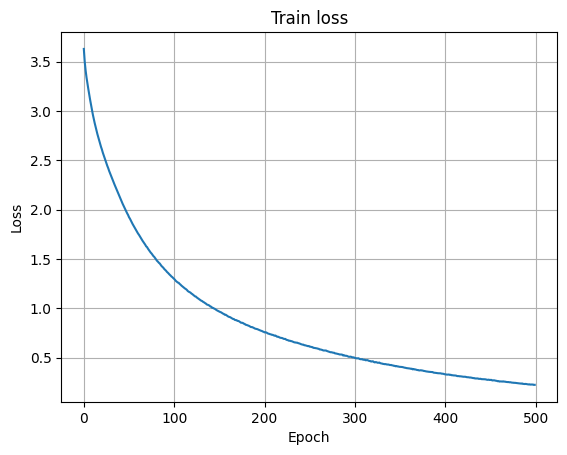

In [17]:
model = initialize_model()

history = model.fit(
    X_train, 
    y_train, 
    validation_data = (X_test, y_test), 
    epochs = 500, 
    batch_size = 16,
    verbose = 0
)
plot_history(history)